<a href="https://colab.research.google.com/github/avinashjairam/avinashjairam.github.io/blob/master/Logistic_Regression_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries

In [5]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib as plt

Reading the data from a csv file into a pandas dataframe

In [6]:
flowers = pd.read_csv('https://raw.githubusercontent.com/avinashjairam/avinashjairam.github.io/master/Iris.csv')

Dropping the ID Column - We don't need it for this exercise.

In [8]:
flowers.drop(columns=['Id'], inplace=True)

Taking a peek at our dataset


In [9]:
flowers.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Looking at the shape of our dataset - It has 150 rows and 4 columns




In [10]:
flowers.shape

(150, 5)

Inspecting what data types are store in the dataframe. It looks like 

---

we have 4 columns of floats and 1 column of strings.

In [11]:
flowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Separating the features from the labels

In [15]:
X = flowers[['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm']].values

In [16]:
y = flowers[['Species']].values

Splitting the Dataset into Training and Test Sets


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Feature Scaling 


In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting the model to the training dataset

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train.ravel())

LogisticRegression(random_state=0)

Using the model to make predictions on the test dataset

In [25]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Predict probabilities
probs_y=classifier.predict_proba(X_test)

In [27]:
flowers['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [49]:
probability = pd.DataFrame(probs_y * 100 , columns =[['Setosa(%)', 'versicolor(%)', 'virginica(%)']])

In [51]:
y_pred_df = pd.DataFrame(y_pred, columns = [['y_pred']])

In [54]:
y_test_df = pd.DataFrame(y_test, columns = [['y_test']])

In [59]:
comparison_of_true_pred = pd.concat([y_test_df, y_pred_df, probability], axis = 1)

In [60]:
comparison_of_true_pred

,y_test,y_pred,Setosa(%),versicolor(%),virginica(%)
0,Iris-virginica,Iris-virginica,0.014462,3.119137,96.866400
1,Iris-versicolor,Iris-versicolor,0.610691,95.166791,4.222517
2,Iris-setosa,Iris-setosa,99.581007,0.418986,0.000006
3,Iris-virginica,Iris-virginica,0.002636,8.155735,91.841629
4,Iris-setosa,Iris-setosa,97.596279,2.403643,0.000077
5,Iris-virginica,Iris-virginica,0.003955,1.006286,98.989759
6,Iris-setosa,Iris-setosa,98.327629,1.672313,0.000057
7,Iris-versicolor,Iris-versicolor,0.719134,71.465883,27.814982
8,Iris-versicolor,Iris-versicolor,0.241071,72.848964,26.909965
9,Iris-versicolor,Iris-versicolor,2.312285,89.387137,8.300578


In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


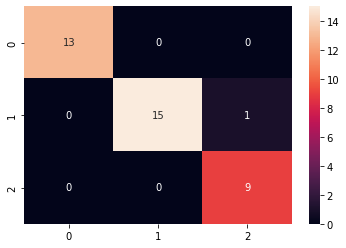

In [64]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

